<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>Sentiment Analysis in Python: Text Preprocessing & Vectorization</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Stop Words, Token Patterns, Stemming, Lemmatization, and TF-IDF)</span></div>

## Table of Contents
1. [Stop Words: Definition and Identification](#section-1)
2. [Removing Stop Words with Word Clouds](#section-2)
3. [Stop Words with Bag of Words (BOW)](#section-3)
4. [Capturing Token Patterns & String Operations](#section-4)
5. [Regular Expressions for Tokenization](#section-5)
6. [Stemming: Concepts and Implementation](#section-6)
7. [Lemmatization: Concepts and Implementation](#section-7)
8. [TF-IDF: Transforming Text](#section-8)
9. [Conclusion](#section-9)

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. Stop Words: Definition and Identification</span><br>

### What are Stop Words?
Stop words are words that occur extremely frequently in a language but are often not considered informative for specific NLP tasks, such as sentiment analysis. Because they appear in almost every document, they do not help distinguish one document from another.

**Common English Stop Words:**
*   `the`, `a`, `an`, `and`, `but`, `for`, `on`, `in`, `at`...

### Context Matters
While standard lists exist, the definition of a "stop word" can depend on the context of your data. For example, in a dataset of movie reviews, words specific to the domain might be considered noise because they appear in every entry.

**Context-specific Stop Words (Movie Domain):**
*   `movie`, `movies`, `film`, `films`, `cinema`

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> Always inspect your specific corpus. If you are analyzing tweets about airlines, "flight" might be a stop word. If you are analyzing movie reviews, "film" might be a stop word. </div>

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. Removing Stop Words with Word Clouds</span><br>

Word clouds are a popular visualization technique. However, if stop words are not removed, the cloud is often dominated by big words like "the" and "and," obscuring the actual meaningful content.

### Implementation
We can use the `wordcloud` library to define a set of stop words and generate a cleaner visualization.

#### Original Code Logic
The following code demonstrates how to import the library, update the stop word set with domain-specific words, and generate the cloud.



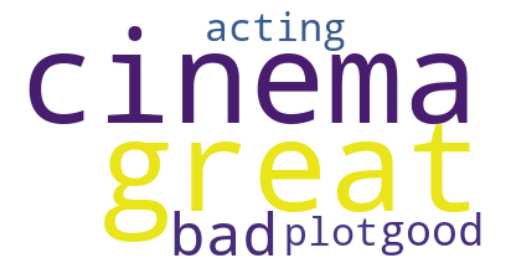

In [1]:
# Import libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Mock data for demonstration purposes
name_string = "movie film watch br movie cinema great bad good acting plot movie film"

# Define the stopwords list
# We start with the default list provided by the library
my_stopwords = set(STOPWORDS)

# Add context-specific words to the set
my_stopwords.update(["movie", "movies", "film", "films", "watch", "br"])

# Generate and show the word cloud
# We pass the custom stopwords set to the WordCloud constructor
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(name_string)

# Display the generated image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off') # Turn off axis numbers
plt.show()



**Explanation:**
1.  **`set(STOPWORDS)`**: Creates a mutable set of default English stop words.
2.  **`.update([...])`**: Adds our custom list (e.g., "movie", "br" for HTML breaks) to the set.
3.  **`WordCloud(...)`**: The `stopwords` argument tells the generator which words to ignore.

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. Stop Words with Bag of Words (BOW)</span><br>

When using `scikit-learn` to create a Bag of Words model (using `CountVectorizer`), we can filter out stop words during the vectorization process.

### Using `CountVectorizer`
We can use the built-in `ENGLISH_STOP_WORDS` from sklearn and extend it with our own.



In [2]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Mock data: A list of reviews
class MockData:
    review = [
        "The movie was great and the cinema was clean",
        "I did not like the film at the theatre",
        "Acting was bad in this movie"
    ]
movies = MockData()

# Define the set of stop words
# Union combines the default sklearn stop words with our custom list
my_stop_words = ENGLISH_STOP_WORDS.union(['film', 'movie', 'cinema', 'theatre'])

# Initialize the vectorizer with the custom stop words
vect = CountVectorizer(stop_words=list(my_stop_words))

# Fit and transform the data
vect.fit(movies.review)
X = vect.transform(movies.review)

# Check the features created (notice 'movie', 'film', 'the', etc. are gone)
print("Features created:", vect.get_feature_names_out())
print("Shape of matrix:", X.shape)


Features created: ['acting' 'bad' 'clean' 'did' 'great' 'like']
Shape of matrix: (3, 6)



**Key Takeaway:** By removing these words, the resulting matrix `X` has fewer columns (features), making the model more efficient and focused on meaningful words like "great", "bad", or "acting".

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. Capturing Token Patterns & String Operations</span><br>

Before vectorization, we often need to clean tokens manually. Python provides robust string operations to check the composition of words.

### String Operators
These methods return a Boolean (`True`/`False`) indicating the content of the string.

*   `my_string.isalpha()`: Checks if composed only of letters.
*   `my_string.isdigit()`: Checks if composed only of digits.
*   `my_string.isalnum()`: Checks if composed of alphanumeric characters (letters + digits).

### Filtering with List Comprehension
We can combine these operators with list comprehension to clean tokenized data.



In [3]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure nltk resources are downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Mock data
reviews_review = ["The movie was 10/10!", "Great... but too long."]

# 1. Original word tokenization
word_tokens = [word_tokenize(review) for review in reviews_review]
print("Original Tokens (first doc):", word_tokens[0])

# 2. Keeping only tokens composed of letters (removes numbers and punctuation)
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]

print("Cleaned Tokens (first doc):", cleaned_tokens[0])

# Comparison of lengths (Hypothetical numbers based on PDF example)
print(f"Length of original token list: {len(word_tokens[0])}")
print(f"Length of cleaned token list: {len(cleaned_tokens[0])}")


Original Tokens (first doc): ['The', 'movie', 'was', '10/10', '!']
Cleaned Tokens (first doc): ['The', 'movie', 'was']
Length of original token list: 5
Length of cleaned token list: 3



<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> Using <code>isalpha()</code> is a quick way to remove punctuation and numbers, leaving only pure text words. </div>

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 5. Regular Expressions for Tokenization</span><br>

Regular expressions (Regex) allow for complex pattern matching.

### Basic Regex Search
We can use the `re` module to find specific patterns, such as a hashtag followed by letters.



In [4]:
import re

my_string = '#Wonderfulday'

# Extract #, followed by any letter, small or capital
# Pattern explanation:
# #      : matches the literal '#' character
# [A-Za-z]: matches any single character that is a letter (upper or lower)
x = re.search('#[A-Za-z]', my_string)

print(x)
# Output indicates a match object was found


<re.Match object; span=(0, 2), match='#W'>



### Token Patterns in `CountVectorizer`
`CountVectorizer` uses a regex pattern to decide what constitutes a "token".

1.  **Default Pattern**: `r'\b\w\w+\b'`
    *   `\b`: Word boundary.
    *   `\w`: Any word character (letter, number, underscore).
    *   `\w+`: One or more word characters.
    *   **Effect**: Selects words with 2 or more characters. Ignores single-letter words like "a" or "I".

2.  **Custom Pattern**:
    You can enforce stricter rules, such as excluding numbers entirely.



In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Specify a particular token pattern
# Pattern: \b[^\d\W][^\d\W]+\b
# [^\d\W]: Matches a character that is NOT a digit (\d) and NOT a non-word character (\W) -> effectively letters only.
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b')

# Test with a string containing numbers
text = ["The movie was 10 times better in 2020"]
vect.fit(text)
print("Tokens found:", vect.get_feature_names_out())
# Note: '10' and '2020' should be excluded based on the pattern


Tokens found: ['better' 'in' 'movie' 'the' 'times' 'was']



---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 6. Stemming: Concepts and Implementation</span><br>

### What is Stemming?
Stemming is the process of transforming words into their root forms. It chops off ends of words based on heuristics.
*   **Crucial Note**: The resulting stem **might not be a valid word** in the language.

**Examples:**
*   `staying`, `stays`, `stayed` $\rightarrow$ `stay`
*   `house`, `houses`, `housing` $\rightarrow$ `hous` (Note: 'hous' is not a dictionary word)

### Stemming in Python (NLTK)
We use the `PorterStemmer` for English.



In [6]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

# Stemming a single string
result = porter.stem('wonderful')
print(f"Original: wonderful -> Stemmed: {result}")


Original: wonderful -> Stemmed: wonder



### Non-English Stemmers
For other languages, NLTK provides the `SnowballStemmer`.



In [7]:
from nltk.stem.snowball import SnowballStemmer

# Initialize a Dutch stemmer
DutchStemmer = SnowballStemmer("dutch")

# Stem a Dutch word
# 'beginnen' means 'to begin'
result_dutch = DutchStemmer.stem("beginnen")
print(f"Original: beginnen -> Stemmed: {result_dutch}")


Original: beginnen -> Stemmed: beginn



### Stemming a Sentence
Stemmers work on individual words, so we must tokenize the sentence first.



In [8]:
from nltk.tokenize import word_tokenize

sentence = 'Today is a wonderful day!'

# 1. Attempting to stem the whole sentence (Incorrect approach)
# This treats the whole sentence as one word
print("Incorrect:", porter.stem(sentence))

# 2. Correct approach: Tokenize then stem
tokens = word_tokenize(sentence)
stemmed_tokens = [porter.stem(token) for token in tokens]

print("Correct:", stemmed_tokens)


Incorrect: today is a wonderful day!
Correct: ['today', 'is', 'a', 'wonder', 'day', '!']



---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 7. Lemmatization: Concepts and Implementation</span><br>

### What is Lemmatization?
Lemmatization is similar to stemming but more sophisticated. It reduces words to their roots (lemmas) that are **valid words** in the language. It often requires knowledge of the Part of Speech (POS).

**Examples:**
*   `stay`, `stays`, `staying` $\rightarrow$ `stay`
*   `house`, `houses`, `housing` $\rightarrow$ `house` (Valid word, unlike 'hous')

### Stemming vs. Lemmatization

| Feature | Stemming | Lemmatization |
| :--- | :--- | :--- |
| **Output** | Roots of words (often non-words) | Actual valid words |
| **Speed** | Fast and efficient to compute | Slower (requires dictionary/POS lookups) |
| **Complexity** | Simple rule-based chopping | Context-aware (depends on POS) |

### Lemmatization in Python
We use `WordNetLemmatizer` from NLTK.



In [9]:
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure wordnet is downloaded
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    nltk.download('wordnet')
    nltk.download('omw-1.4')

WNlemmatizer = WordNetLemmatizer()

# Lemmatize with Part of Speech specification
# pos='a' stands for Adjective
result = WNlemmatizer.lemmatize('wonderful', pos='a')

print(f"Original: wonderful -> Lemmatized: {result}")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohdf\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mohdf\AppData\Roaming\nltk_data...


Original: wonderful -> Lemmatized: wonderful



---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 8. TF-IDF: Transforming Text</span><br>

TF-IDF stands for **Term Frequency - Inverse Document Frequency**. It is a statistical measure used to evaluate how important a word is to a document in a collection (corpus).

### Components
1.  **TF (Term Frequency):** How often a given word appears within a specific document.
2.  **IDF (Inverse Document Frequency):** The log-ratio of the total number of documents to the number of documents containing the specific word.
    *   Words that appear in *many* documents (like "the") have a **low** IDF.
    *   Words that appear in *few* documents have a **high** IDF.

### The Formula
$$ \text{TfIdf} = \text{Term Frequency} \times \text{Inverse Document Frequency} $$

### Why is it useful?
*   **Penalizes frequent words:** Unlike Bag of Words (BOW), TF-IDF automatically lowers the weight of common words (stop words) without needing to manually remove them.
*   **Highlights unique content:** It captures words that are common within a specific document but rare across the rest of the corpus.
*   **Search & Retrieval:** Highly useful for ranking search results.

**Example (Airline Sentiment):**
*   Words like "United" or "Virgin America" might have **low** TF-IDF scores if they appear in every tweet in that specific dataset.
*   Specific complaints like "check-in process" might have **high** scores if they only appear in a few specific tweets.

### Implementation in Python (`TfidfVectorizer`)



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Mock Data: Tweets
class MockTweets:
    text = [
        "The airline was late",
        "The airline lost my bag",
        "I love this airline",
        "The bag was heavy"
    ]
tweets = MockTweets()

# Initialize TfidfVectorizer
# Arguments available: max_features, ngrams_range, stop_words, token_pattern, max_df, min_df
vect = TfidfVectorizer(max_features=100)

# Fit and transform the data
vect.fit(tweets.text)
X = vect.transform(tweets.text)

# X is a sparse matrix
print(f"Shape of X: {X.shape}")
print(f"Type of X: {type(X)}")

# Convert to DataFrame for visualization (as seen in the PDF)
# toarray() converts the sparse matrix to a dense format
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

# Display the first few rows
print("\nTF-IDF DataFrame:")
print(X_df.head())

Shape of X: (4, 10)
Type of X: <class 'scipy.sparse._csr.csr_matrix'>

TF-IDF DataFrame:
    airline       bag     heavy      late      lost      love        my  \
0  0.408922  0.000000  0.000000  0.640655  0.000000  0.000000  0.000000   
1  0.344321  0.425305  0.000000  0.000000  0.539445  0.000000  0.539445   
2  0.411378  0.000000  0.000000  0.000000  0.000000  0.644503  0.000000   
3  0.000000  0.484263  0.614226  0.000000  0.000000  0.000000  0.000000   

        the      this       was  
0  0.408922  0.000000  0.505100  
1  0.344321  0.000000  0.000000  
2  0.000000  0.644503  0.000000  
3  0.392053  0.000000  0.484263  



**Understanding the Output:**
The resulting DataFrame shows numbers between 0 and 1 (usually).
*   If a word (e.g., "bag") appears in a document, it has a non-zero value.
*   The value represents the "weight" or importance of that word in that specific document relative to the whole corpus.

---

<br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 9. Conclusion</span><br>

In this notebook, we covered essential text preprocessing and vectorization techniques for Sentiment Analysis:

1.  **Stop Words:** We learned that common words ('the', 'and') often constitute noise. We can remove them using lists in `WordCloud` or `CountVectorizer`.
2.  **Token Patterns:** We used string methods (`isalpha`) and Regex to clean tokens and define strict patterns for what constitutes a "word".
3.  **Normalization:**
    *   **Stemming** chops words to their root (fast, but crude).
    *   **Lemmatization** reduces words to their dictionary root (slower, but accurate).
4.  **TF-IDF:** We moved beyond simple counting (BOW). TF-IDF weighs words by their uniqueness, automatically penalizing common words and highlighting informative ones.

**Next Steps:**
With these vectors (X), you are now ready to feed your text data into machine learning models (like Logistic Regression or Naive Bayes) to predict sentiment!
